In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 

from numpy.random import randn

from pandas import DataFrame, Series

from bb_binary import Repository, convert_frame_to_numpy

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [3]:
repo = Repository('../00_Data/testset_2015_1h/2015082215')

In [5]:
camID = None

In [6]:
len(list(repo.iter_fnames(cam=camID)))

56

In [7]:
frames = list(repo.iter_frames(cam=camID))

In [8]:
len(frames)

57344

In [9]:
f = frames[1023]

In [10]:
len(f)

2

In [11]:
frame = f[0]
frameContainer = f[1]

## Frame attributes
```
id @0 :UInt64;                 # global unique id of the frame
dataSourceIdx @1:UInt32;       # the frame is from this data source
frameIdx @6 :UInt32;           # sequential increasing index for every data source.
timestamp @2 :Float64;         # unix time stamp of the frame
timedelta @3 :UInt32;          # time difference between this frame and the frame before in microseconds
```

In [12]:
print("id: {}".format(frame.id))
print("dataSourceIdx: {}".format(frame.dataSourceIdx))
print("frameIdx: {}".format(frame.frameIdx))
print("timestamp: {}".format(frame.timestamp))
print("timedelta: {}".format(frame.timedelta))
print("len detection: {}".format(len(frame.detectionsUnion.detectionsDP)))


id: 0
dataSourceIdx: 0
frameIdx: 1023
timestamp: 1444057348.485803
timedelta: 0
len detection: 29


## Frame Container attributes
```
  id @0 :UInt64;                    # global unique id of the frame container
  dataSources @1:List(DataSource);  # list of data sources (videos / images)
  fromTimestamp @2 :Float64;        # unix timestamp of the first frame
  toTimestamp @3 :Float64;          # unix timestamp of the last frame
  frames @4 :List(Frame);           # frames must be sorted by in the order they where recorded.
  camId @5 :UInt16;                 # the cam number
  hiveId @6 :UInt16;                # the id of the hive
  transformationMatrix @7 :List(Float32);
```

In [13]:
print("id: {}".format(frameContainer.id))
print("len dataSources: {}".format(len(frameContainer.dataSources)))
print("dataSources: {}".format(frameContainer.dataSources))
print("fromTimestamp: {}".format(frameContainer.fromTimestamp))
print("toTimestamp: {}".format(frameContainer.toTimestamp))
print("len frames: {}".format(len(frameContainer.frames)))
print("camId: {}".format(frameContainer.camId))
print("hiveId: {}".format(frameContainer.hiveId))
print("transformationMatrix: {}".format(frameContainer.transformationMatrix))

id: 17415910220773240986
len dataSources: 1
dataSources: [ ( idx = 0,
    filename = "Cam_3_20151005165647_469298_TO_Cam_3_20151005170228_485803.mkv" ) ]
fromTimestamp: 1444057007.469298
toTimestamp: 1444057348.485803
len frames: 1024
camId: 3
hiveId: 0
transformationMatrix: []


```
0    13267605695333194752
1    13267605695333194752
2    13267605695333194752
...
1023 13267605695333194752

1024 13331998411278232559
...
2047 13331998411278232559

2048 9471591813396092983
```

In [14]:
frame_list = []
for f,c in frames:
    frame_list.append({'f_idx': f.frameIdx,
                       'f_timestamp': f.timestamp,
                       'f_detections': len(f.detectionsUnion.detectionsDP),
                       'c_id': c.id,
                       'c_cam_id': c.camId
                       } )

In [15]:
df = DataFrame(frame_list)

In [14]:
# df.describe()

## Number of Detections per Frame

In [16]:
df.count()

c_cam_id        57344
c_id            57344
f_detections    57344
f_idx           57344
f_timestamp     57344
dtype: int64

In [17]:
df.shape

(57344, 5)

In [18]:
subset = df[:2048]

In [19]:
subset.columns

Index(['c_cam_id', 'c_id', 'f_detections', 'f_idx', 'f_timestamp'], dtype='object')

In [20]:
subset.ix[[0,1023,1024]]

,c_cam_id,c_id,f_detections,f_idx,f_timestamp
0,3,17415910220773240986,23,0,1.444057e+09
1023,3,17415910220773240986,29,1023,1.444057e+09
1024,1,10134891941190964816,62,0,1.444057e+09


In [21]:
span = df.f_timestamp.max() - df.f_timestamp.min()
span/60

68.273371684551236

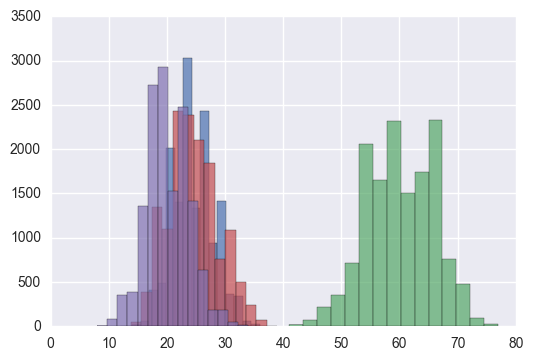

In [22]:
for i in range(4):
        dataset1 = df[df.c_cam_id == i].f_detections

        #Plot a histogram of the dataset, note bins=10 by default
        plt.hist(dataset1, alpha=0.7, bins=15)

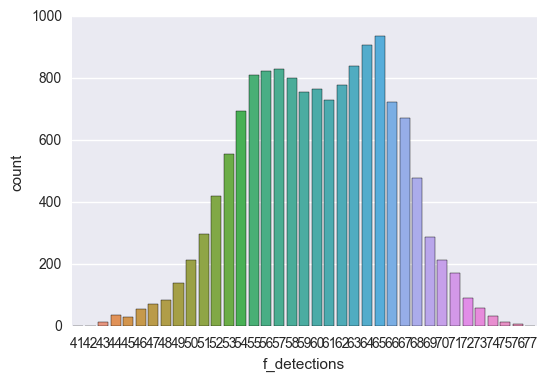

In [24]:
ax = sns.countplot(x='f_detections', data=df[df.c_cam_id == 1])

In [25]:
cam = df[df.c_cam_id == 3]
arr = list(range(len(cam)))
cam['col'] = arr
cam.head()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,c_cam_id,c_id,f_detections,f_idx,f_timestamp,col
0,3,17415910220773240986,23,0,1.444057e+09,0
1,3,17415910220773240986,22,1,1.444057e+09,1
2,3,17415910220773240986,23,2,1.444057e+09,2
3,3,17415910220773240986,23,3,1.444057e+09,3
4,3,17415910220773240986,22,4,1.444057e+09,4


In [53]:
cam = cam.set_index(cam.col)
cam.head()

,c_cam_id,c_id,f_detections,f_idx,f_timestamp,col
col,,,,,,
0,3,16645562255532878167,53,0,1.442275e+09,0
1,3,16645562255532878167,54,1,1.442275e+09,1
2,3,16645562255532878167,52,2,1.442275e+09,2
3,3,16645562255532878167,54,3,1.442275e+09,3
4,3,16645562255532878167,57,4,1.442275e+09,4


In [54]:
array = list(range(0,len(cam),1000))

In [55]:
cam = cam.ix[array]

In [56]:
cam.head()

,c_cam_id,c_id,f_detections,f_idx,f_timestamp,col
col,,,,,,
0,3,16645562255532878167,53,0,1.442275e+09,0
1000,3,16645562255532878167,50,1000,1.442275e+09,1000
2000,3,12893511600649459610,53,976,1.442276e+09,2000
3000,3,15658072471154873523,51,952,1.442276e+09,3000
4000,3,13841222198001369218,43,928,1.442276e+09,4000


In [57]:
cam = cam.set_index(cam.f_timestamp)

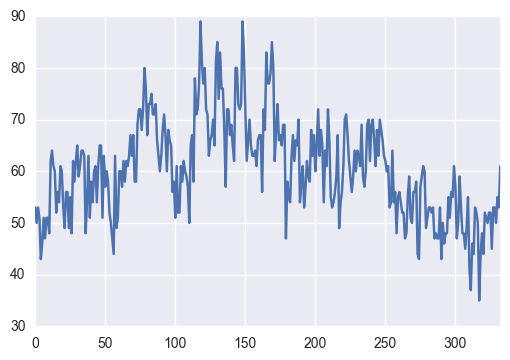

In [58]:

sns.tsplot([cam.f_detections])